In [119]:
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
import textblob
from textblob import TextBlob
from textblob import Word
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.metrics import precision_score,recall_score,fbeta_score,confusion_matrix

In [121]:
tweet=pd.read_excel("tumtwetler.xlsx") # tweetleri dataframe yaptık 
tweet_df=pd.DataFrame(tweet)
#print(tweet_df)

In [122]:
haber=pd.read_excel("rrhaberr.xlsx") # haberleri dataframe yaptık 
haber_df=pd.DataFrame(haber)
#print(haber_df)

# Text Preprocessing

   ---Lower-Case---stringlerin harfleri küçük hale geldi

In [123]:
 # tweetler için yapıldı
tweet_df['tweet'] = tweet_df['tweet'].str.lower() 
#print(tweet_df['tweet']) 

In [124]:
# haberler için yapıldı
haber_df['haber'] = haber_df['haber'].str.lower() 
#print(haber_df['haber']) 


  -----noktalama işaretleri---

In [125]:
# tweetler için noktalama işaretleri, özel karakterler silindi
tweet_df['tweet'] = tweet_df['tweet'].str.translate(str.maketrans('', '', string.punctuation))
tweet_df['tweet']

0                                    can you play chess 
1      bayraktar tb3 ve akıncı yerli uçak motoru pd17...
2      aselsan bence tb2 gibi daha ufak sihalarda yer...
3      pd170 akıncı ti̇hada ve yeni geliştirilecek ba...
4                      teşekkürler sayın selçukbayraktar
                             ...                        
145     tam da ukraynanın ve türkiyenin mi6 bşk ziyar...
146    zona positive ermenistan türkiye ukraynanın kı...
147    rusya türkiye ilişkilerini takip eden biri rus...
148    türkiye saman ve hayvan ithal etmek yerine rus...
149    türkiyeden müthiş başarı rusya i̇ngiltere ukra...
Name: tweet, Length: 150, dtype: object

In [126]:
#haberler için noktalama işaretleri, özel karakterler silindi
haber_df['haber']  = haber_df['haber'] .str.translate(str.maketrans('', '', string.punctuation))
#print(haber_df['haber'] )


-----sayılar---

In [127]:
#sayılar silindi tweetler için
tweet_df['tweet'] = tweet_df['tweet'].str.replace('\d','')
#print(tweet_df['tweet'])

In [128]:
#sayılar silindi haberler için
haber_df['haber']  = haber_df['haber'] .str.replace('\d','')
#print(haber_df['haber'])


## Test-Train 

In [129]:
#true-false haberlerim için bir model oluşturma işlemi
train_x, test_x, train_y, test_y = model_selection.train_test_split(haber_df['haber'],haber_df['dogru_yanlis'],random_state = 1)


In [130]:
# 'dogru_yanlis' sütununun altında yer alan true-false ifadelerini numerik değere dönüştürme işlemleri için 
#encoder dönüştürücüsü tanımladım
encoder = preprocessing.LabelEncoder()

In [131]:
#modelimde ki train_y, test_y de var olan 'dogru_yanlis' sutünları için encoder işlemi gerçekleşti
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

## Count vectors

In [132]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer()

In [133]:
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)
vectorizer.get_feature_names()[0:11]

['acil',
 'adayı',
 'adet',
 'ajansı',
 'ak',
 'akar',
 'akinci',
 'aksungur',
 'alan',
 'alanda',
 'alanında']

In [134]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Machine Learning Algorithm

In [135]:
nb = naive_bayes.MultinomialNB()
nb_model = nb.fit(x_train_count,train_y)

In [136]:
accuracy = model_selection.cross_val_score(nb_model, x_test_count, test_y, cv = 5).mean()
print("Accuracy:", accuracy)

Accuracy: 0.7999999999999999


In [137]:
test_data_predict=nb_model.predict(x_test_count)
conf_matrix=confusion_matrix(test_y,test_data_predict)
conf_matrix # 4 adet hatalı sınıflandırma var

array([[ 1,  4],
       [ 0, 10]], dtype=int64)

Text(0.5, 1.0, 'Confusion-Matrix')

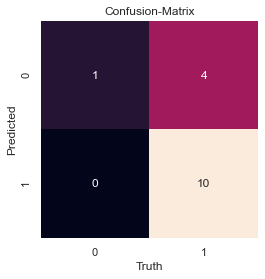

In [138]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
names = np.unique(test_y)
sns.heatmap(con_m, square=True, annot=True, fmt='d', cbar=False,xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.title('Confusion-Matrix')


In [139]:
precision =precision_score(test_y,test_data_predict)
print("Precision:", precision)

Precision: 0.7142857142857143


In [140]:
recall=recall_score(test_y,test_data_predict)
print("Recall:", recall)

Recall: 1.0


In [141]:
f_measure=fbeta_score(test_y,test_data_predict,beta=1) #beta precison etkisini belirler
print("F-measure:", f_measure)

F-measure: 0.8333333333333333


In [142]:
f_score

0.8333333333333333

In [143]:
tweet_df=pd.Series(tweet_df["tweet"])

In [144]:
tweet_df_c=vectorizer.transform(tweet_df)

In [145]:
matris=nb_model.predict(tweet_df_c)

In [146]:
matris

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)